In [30]:
 #!pip install scikit-fuzzy --upgrade
 #!pip install scikit-fuzzy===0.4.2
!pip install -U scikit-fuzzy

  Using cached scikit_fuzzy-0.5.0-py2.py3-none-any.whl.metadata (2.6 kB)
Using cached scikit_fuzzy-0.5.0-py2.py3-none-any.whl (920 kB)
  Attempting uninstall: scikit-fuzzy
    Found existing installation: scikit-fuzzy 0.4.2
    Uninstalling scikit-fuzzy-0.4.2:
      Successfully uninstalled scikit-fuzzy-0.4.2


In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card (1).csv


In [34]:
base = pd.read_csv('/content/UCI_Credit_Card.csv')
base.shape

(30000, 25)

In [14]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base[ 'BILL_AMT5'] + base[ 'BILL_AMT6']
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [18]:
X = base.iloc[:,[1,25]].values
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [23]:
X.shape

(30000, 2)

In [24]:
X.T.shape

(2, 30000)

In [39]:
r = fuzz.cmeans(data = X.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)
r

(array([[-0.73894409, -0.30170806],
        [ 0.75000037,  2.01662719],
        [ 0.97503268, -0.42055518]]),
 array([[0.91181131, 0.84857614, 0.97912683, ..., 0.95010603, 0.95612995,
         0.97293022],
        [0.02591875, 0.02732212, 0.00499203, ..., 0.01491364, 0.01405584,
         0.00905857],
        [0.06226994, 0.12410173, 0.01588115, ..., 0.03498033, 0.02981421,
         0.01801121]]),
 array([[0.14306765, 0.3940122 , 0.5974131 , ..., 0.28756587, 0.27668099,
         0.67503917],
        [0.36643322, 0.3654569 , 0.0837225 , ..., 0.27270196, 0.30297276,
         0.14000871],
        [0.49049914, 0.2405309 , 0.3188644 , ..., 0.43973217, 0.42034625,
         0.18495211]]),
 array([[0.55635806, 0.52135267, 0.20025521, ..., 0.39092732, 0.30019184,
         0.25949391],
        [3.29989264, 2.90549279, 2.80456001, ..., 3.12025611, 2.47587661,
         2.68929402],
        [2.12896075, 1.3632895 , 1.5723977 , ..., 2.03737101, 1.69998727,
         1.90720126]]),
 array([25826.662265

In [45]:
previsoes_porcentagem = r[1]
previsoes_porcentagem.shape

(3, 30000)

In [46]:
previsoes_porcentagem

array([[0.91181131, 0.84857614, 0.97912683, ..., 0.95010603, 0.95612995,
        0.97293022],
       [0.02591875, 0.02732212, 0.00499203, ..., 0.01491364, 0.01405584,
        0.00905857],
       [0.06226994, 0.12410173, 0.01588115, ..., 0.03498033, 0.02981421,
        0.01801121]])

In [47]:
previsoes_porcentagem[0][0]

0.911811308862749

In [48]:
previsoes_porcentagem[1][0]

0.025918753879260795

In [49]:
previsoes_porcentagem[2][0]

0.06226993725799025

In [50]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [52]:
previsoes = previsoes_porcentagem.argmax(axis=0)
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
previsoes[5000]

0

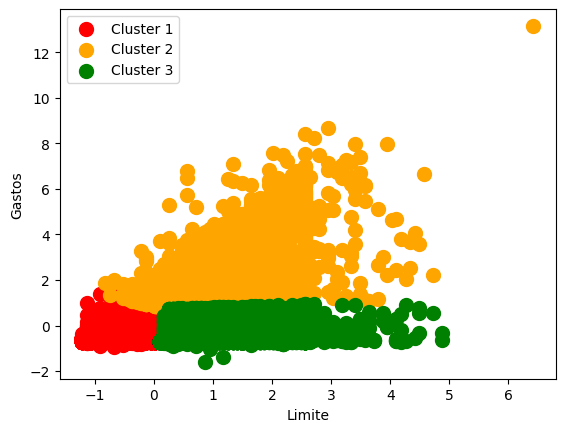

In [54]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()
